In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%%HTML
<script src="require.js"></script>

In [2]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

import time,datetime

In [3]:
df = pd.read_excel('data/data.xlsx')

df.last_login_time = pd.to_datetime(df.last_login_time)
# now = datetime.datetime.now()
# delta = (now - df.last_login_time).dt
end = pd.to_datetime('2022-04-25 17:00:00')
delta = (end - df.last_login_time).dt
df = df.assign(leave_days = delta.total_seconds() / 86400)

In [4]:
# dict_channel = {
#     105 : '快游-iOS',
#     106 : '快游-iOS',
#     301 : '手盟-and',
#     302 : '快玩-and',
#     303 : '1567-and',
#     304 : '快游-and',
#     305 : '快游-and',
# }

dict_channel = {
    '快游_IOS_P2_崛起_虫族入侵' : '快游-iOS',
    '快游_IOS_P1_幸存者计划' : '快游-iOS',
    '手盟_安卓_G9_幸存者计划' : '手盟-and',
    '快玩_安卓_G10_幸存者计划' : '快玩-and',
    'a1576_安卓_G11_幸存者计划' : '1567-and',
    '快游_安卓_G12_新生态崛起：虫族入侵' : '快游-and',
    '快游_安卓_G13_新生态幸存者计划' : '快游-and',
}

df = df.assign(channel_cn = df.channel.apply(lambda x : dict_channel[x]))
# px.data.tips()

In [5]:
# dict_item = pd.read_excel('data/item_data.xlsx').loc[:, ['payMoneyId', 'name']].set_index('payMoneyId').to_dict()['name']
# df.first_recharge_item.apply(lambda x : dict_item[x])

---

```

字段

model -- 机型
level -- city level?
max_beauty -- 好感度最高的秘书等级
beauty_Intimacy -- 好感度值
hero_level -- 黑皇后等级
last_journey -- 远征
cur_dupicate -- 战役
title -- 军衔
td_count -- 塔防次数
kill_monster_num -- 击杀虫族量
attack_player_num -- 城战数
gold_cost -- 钻石的总消耗数
gold -- 剩余钻石数
vip -- vip level
first_login_time
last_login_time
first_recharge_time
last_recharge_time
first_recharge_item -- 首充购买物品
first_recharge_time_diff_1 -- 首次付费时间-开服时间(h)
first_recharge_time_diff_2 -- 首次付费时间-创角时间(h)
second_recharge_time -- 二次付费时间点
second_recharge_amount -- 二次付费金额
second_recharge_item -- 二次付费购买物品
recharge_amount -- 总充值金额
recharge_times -- 总充值次数

```
---

#### 主力机型主要是华为 vivo oppo 小米

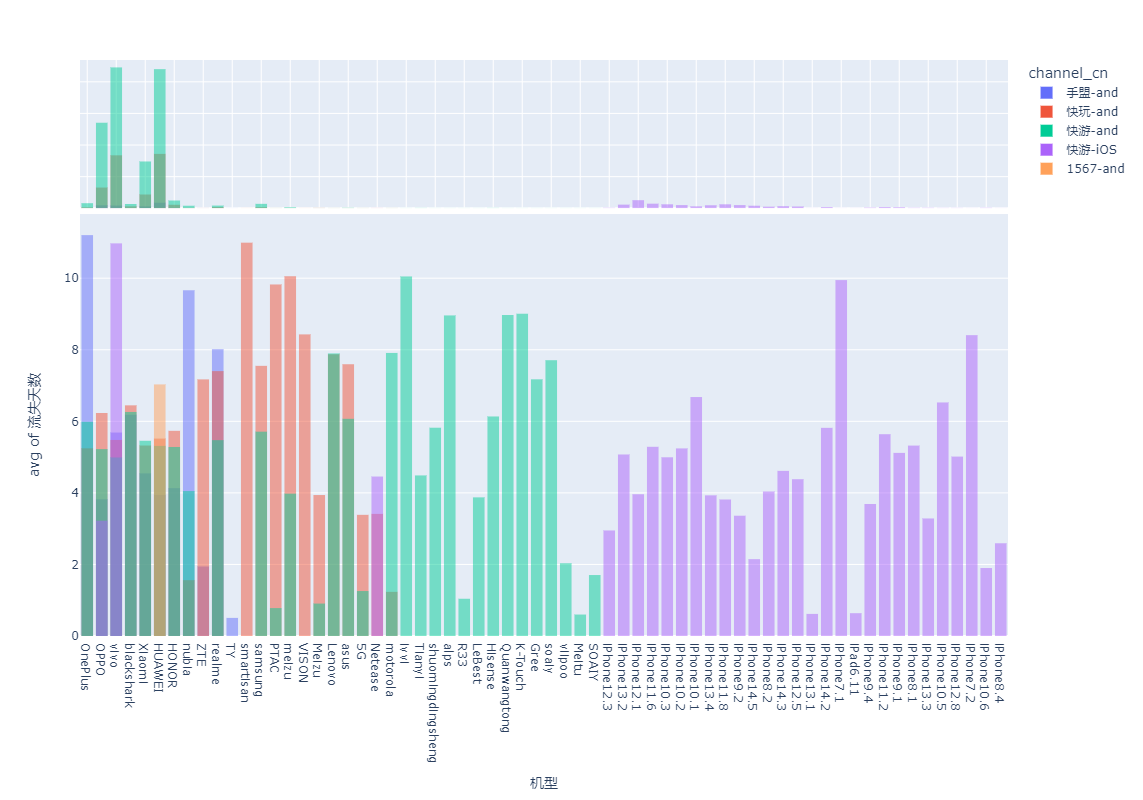

In [6]:
# px.histogram(df.query('channel_cn != "快游-iOS" & model in ["HUAWEI", "Xiaomi", "vivo", "OPPO"]'), 
#              x='model', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', 
#              height=800, barmode='overlay')

# px.histogram(df.query('channel_cn != "快游-iOS"'), 
fig_model = px.histogram(df, 
                         x='model', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', 
                         height=800, barmode='overlay',
                         labels = {'model':'机型', 'leave_days':'流失天数'}
                        )
fig_model.show()

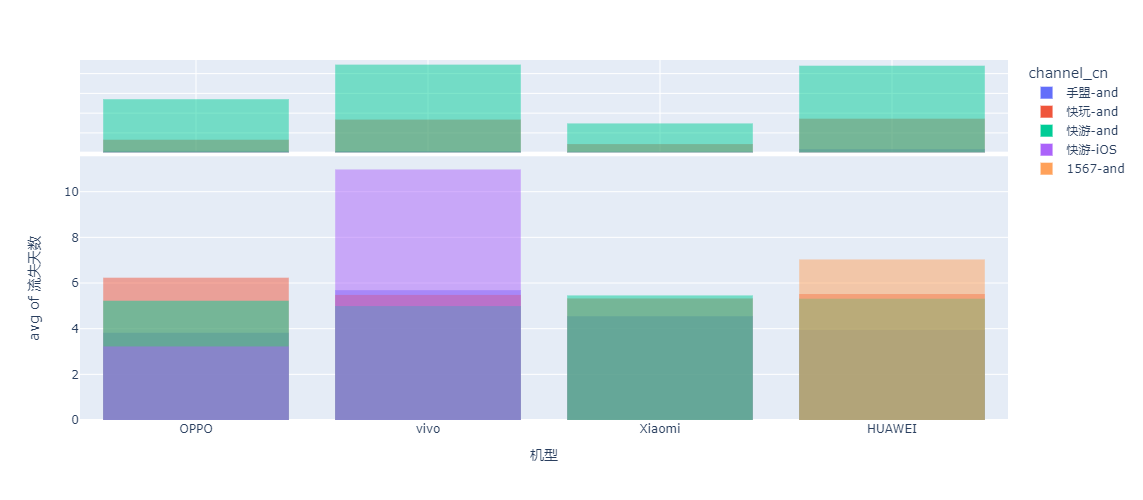

In [7]:
fig_model_top4 = px.histogram(df.query("model in ['OPPO', 'vivo', 'Xiaomi', 'HUAWEI']"), 
             x='model', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                             labels = {'model':'机型', 'leave_days':'流失天数'})
fig_model_top4.update_layout(
    autosize=False,
    width=500,
    height=500
)

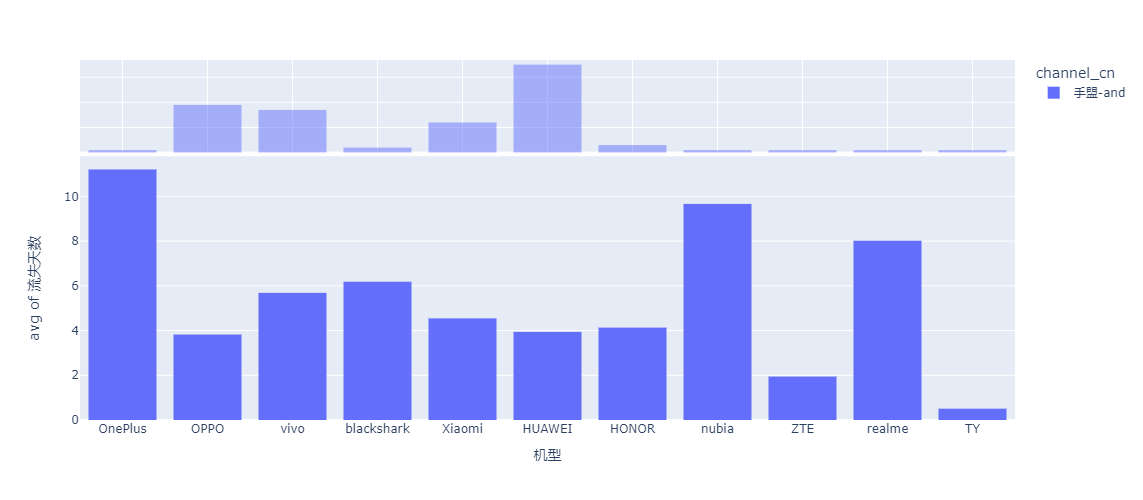

In [8]:
fig_model_sm = px.histogram(df.query('channel_cn == "手盟-and"'), x='model', 
                            y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn',
                           labels = {'model':'机型', 'leave_days':'流失天数'})
fig_model_sm.update_layout(
    autosize=False,
    width=800,
    height=500
)

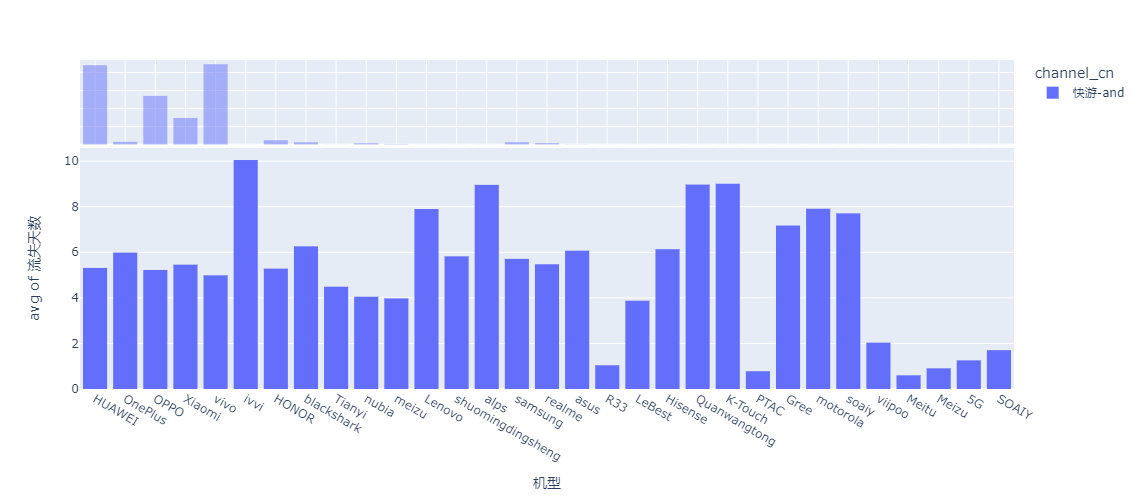

In [9]:
fig_model_ky_and = px.histogram(df.query('channel_cn == "快游-and"'), 
                                x='model', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn',
                               labels = {'model':'机型', 'leave_days':'流失天数'})
fig_model_ky_and.update_layout(
    autosize=False,
    width=1000,
    height=500
)

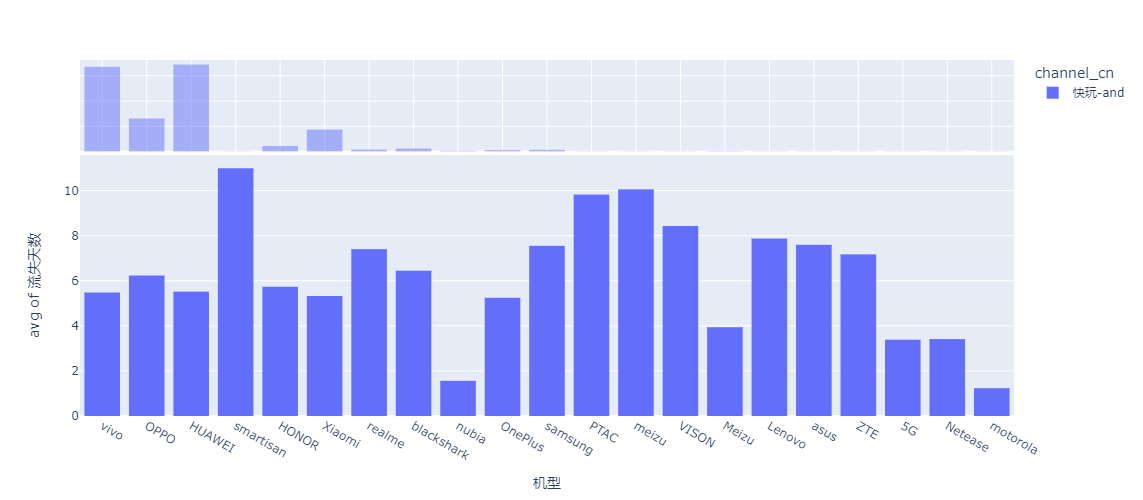

In [10]:
fig_model_kw_and = px.histogram(df.query('channel_cn == "快玩-and"'), 
                                x='model', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn',
                               labels = {'model':'机型', 'leave_days':'流失天数'})
fig_model_kw_and.update_layout(
    autosize=False,
    width=800,
    height=500
)

---

等级

---

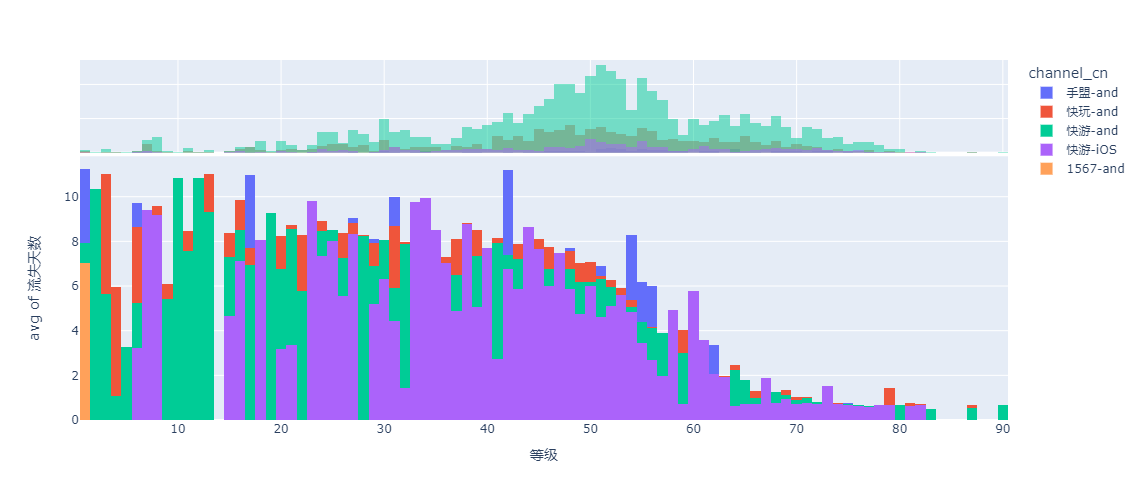

In [52]:
fig_level = px.histogram(df, 
                                x='level', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn',
                               labels = {'level':'等级', 'leave_days':'流失天数'})
fig_level.update_layout(
    autosize=False,
    width=800,
    height=500
)

---

好感度最高的秘书等级

---

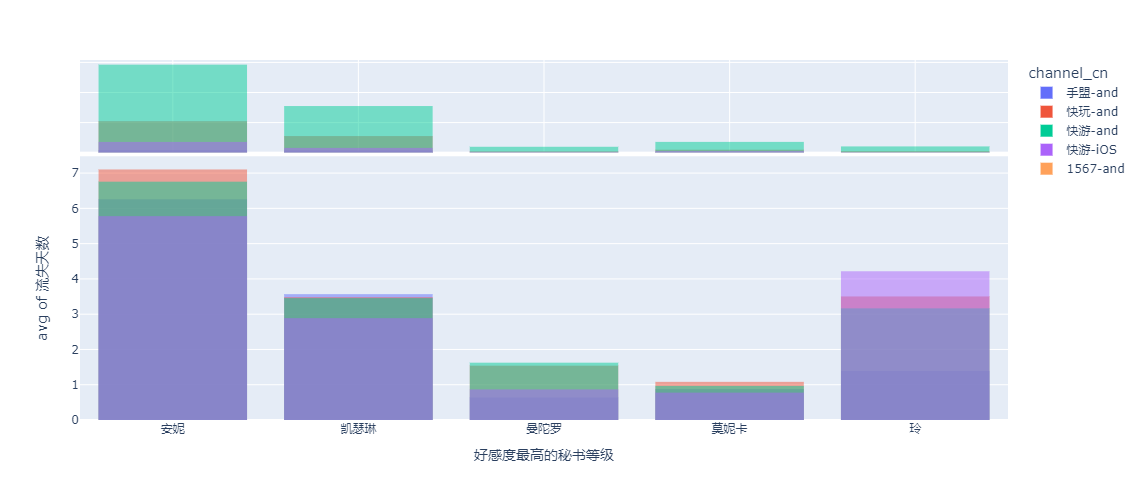

In [11]:
fig_max_beauty = px.histogram(df, x='max_beauty', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                             labels = {'max_beauty':'好感度最高的秘书等级', 'leave_days':'流失天数'})
fig_max_beauty.update_layout(
    autosize=False,
    width=500,
    height=500
)

---

好感度值

---

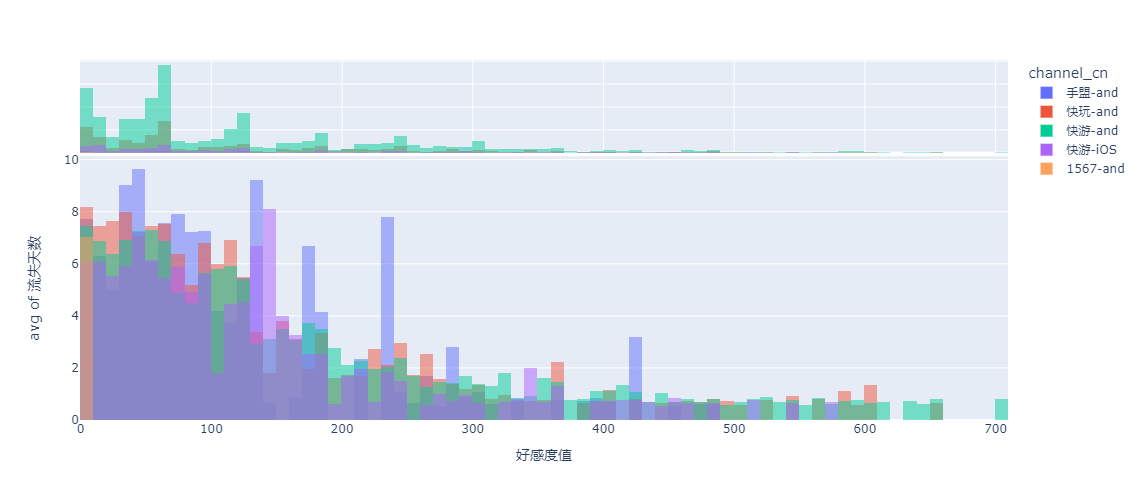

In [12]:
fig_beauty_Intimacy = px.histogram(df, x='beauty_Intimacy', y='leave_days', 
                                   marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                                   labels = {'beauty_Intimacy':'好感度值', 'leave_days':'流失天数'}
                                  )
fig_beauty_Intimacy.update_layout(
#     autosize=False,
#     width=1000,
    height=500
)
# fig_beauty_Intimacy.show()

---

黑皇后等级

---

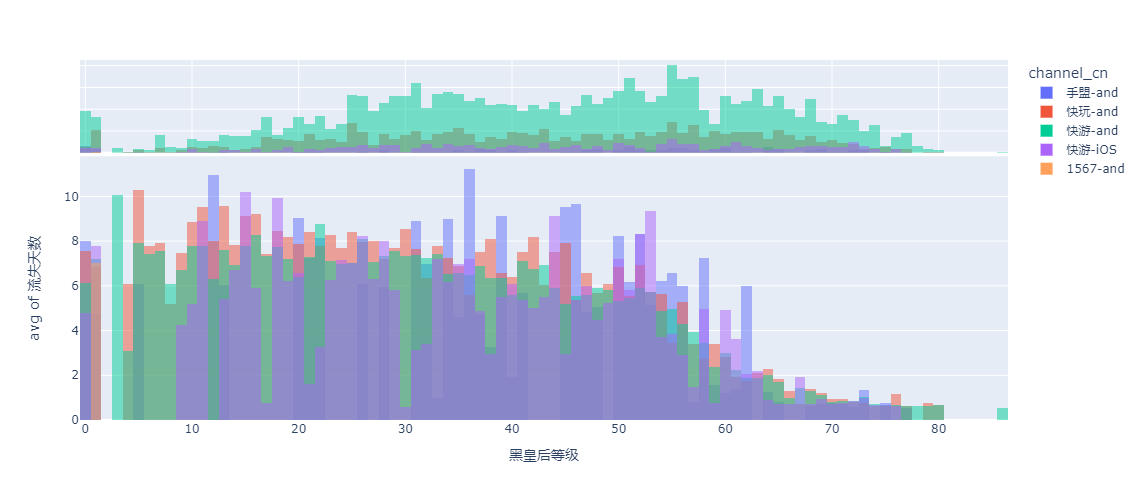

In [14]:
fig_hero_level = px.histogram(df, x='hero_level', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                             labels = {'hero_level':'黑皇后等级', 'leave_days':'流失天数'})
fig_hero_level.update_layout(
#     autosize=False,
#     width=1000,
    height=500
)

---

远征

---

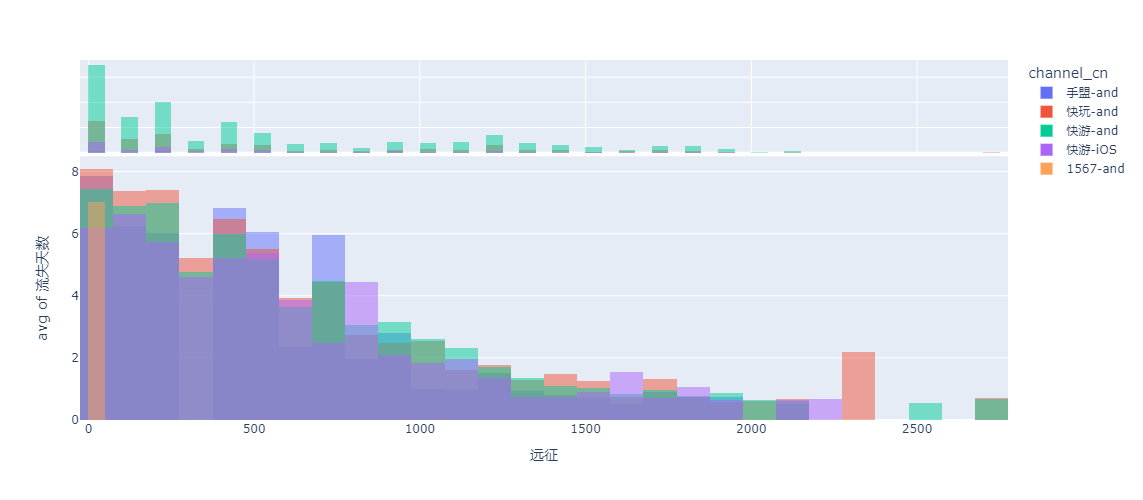

In [15]:
fig_last_journey = px.histogram(df, x='last_journey', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                               labels = {'last_journey':'远征', 'leave_days':'流失天数'})
fig_last_journey.update_layout(
#     autosize=False,
    width=800,
    height=500
)

---

战役

---

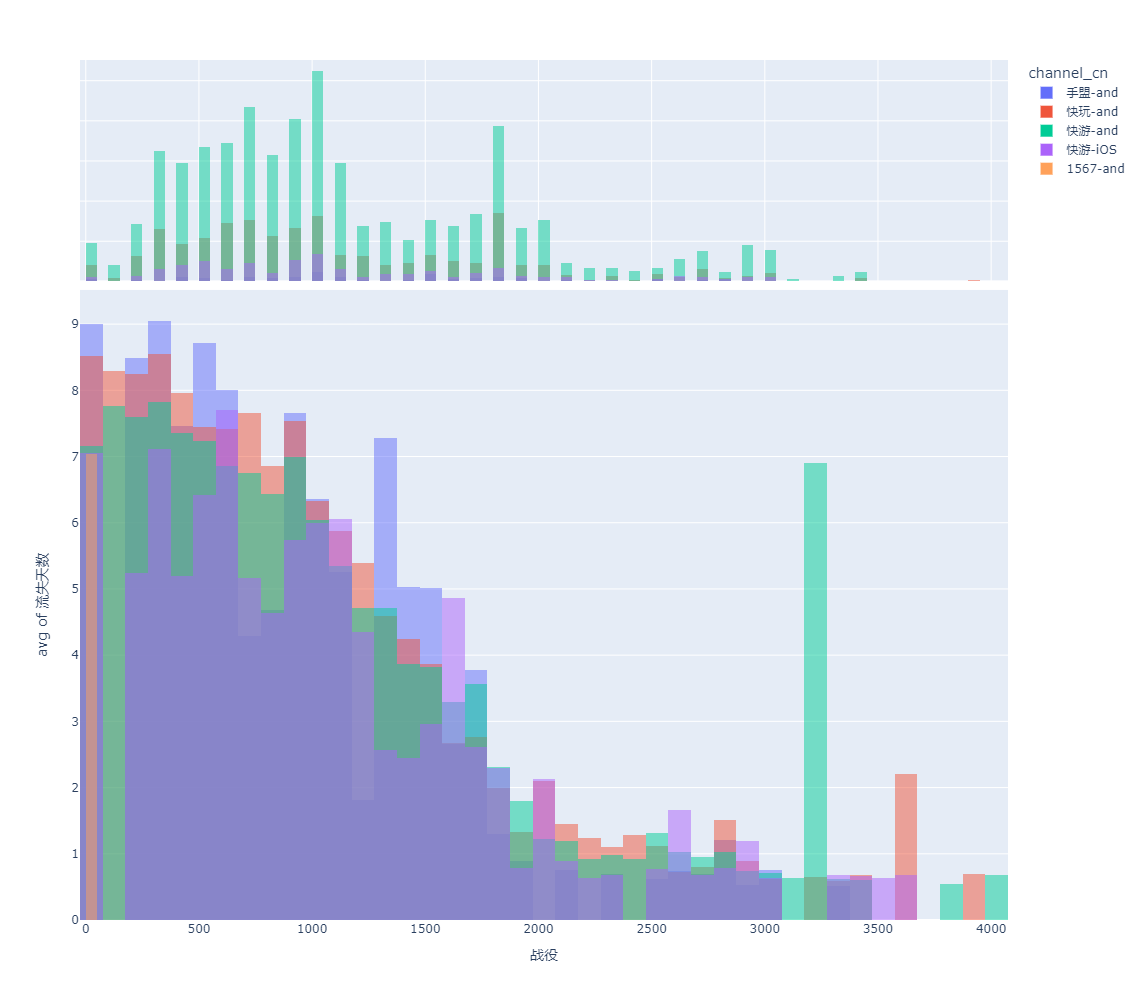

In [17]:
fig_cur_dupicate = px.histogram(df, x='cur_dupicate', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                               labels = {'cur_dupicate':'战役', 'leave_days':'流失天数'})
fig_cur_dupicate.update_layout(
#     autosize=False,
#     width=1000,
    height=1000
)

---

军衔

---

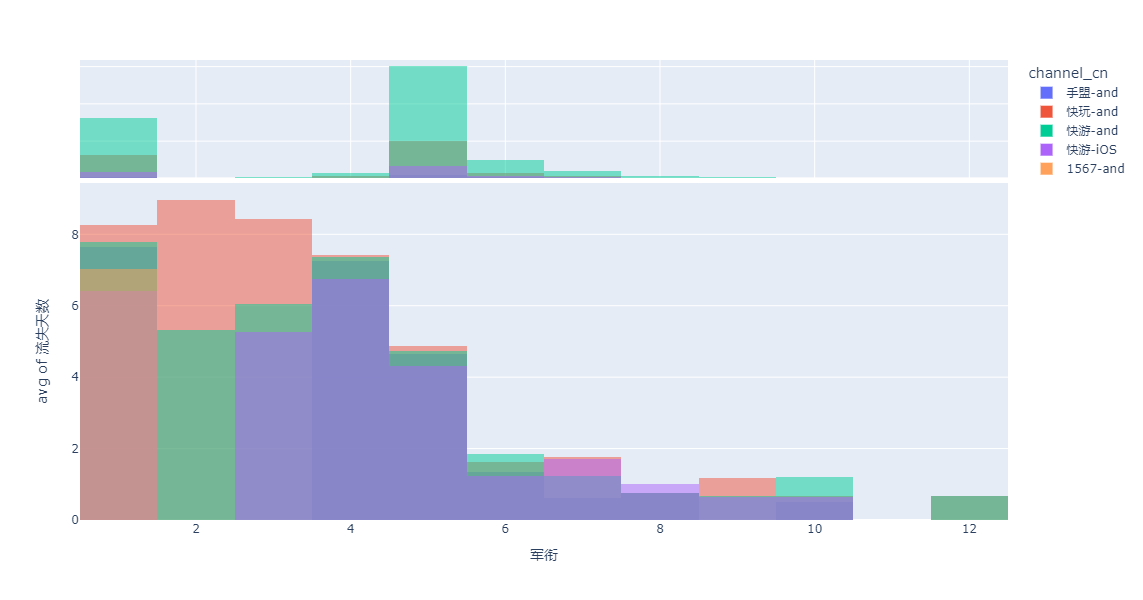

In [18]:
fig_title = px.histogram(df, x='title', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                        labels = {'title':'军衔', 'leave_days':'流失天数'})
fig_title.update_layout(
#     autosize=False,
    width=600,
    height=600
)

---

塔防次数

---

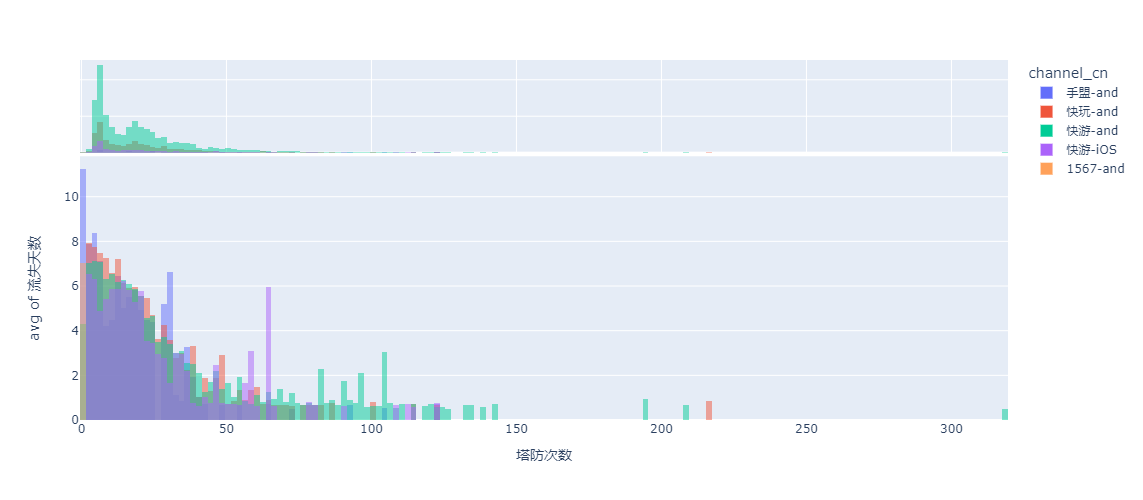

In [19]:
fig_td_count = px.histogram(df, x='td_count', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                           labels = {'td_count':'塔防次数', 'leave_days':'流失天数'})
fig_td_count.update_layout(
#     autosize=False,
#     width=600,
    height=500
)

---

击杀虫族量

---

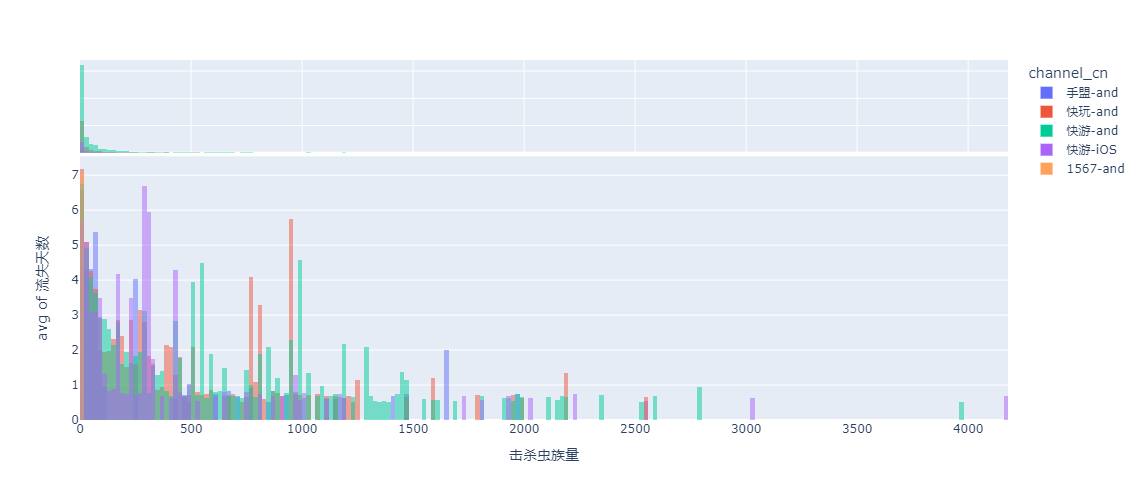

In [20]:
fig_kill_monster_num = px.histogram(df, x='kill_monster_num', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                                   labels = {'kill_monster_num':'击杀虫族量', 'leave_days':'流失天数'})
fig_kill_monster_num.update_layout(
#     autosize=False,
#     width=600,
    height=500
)

---

城战数

---

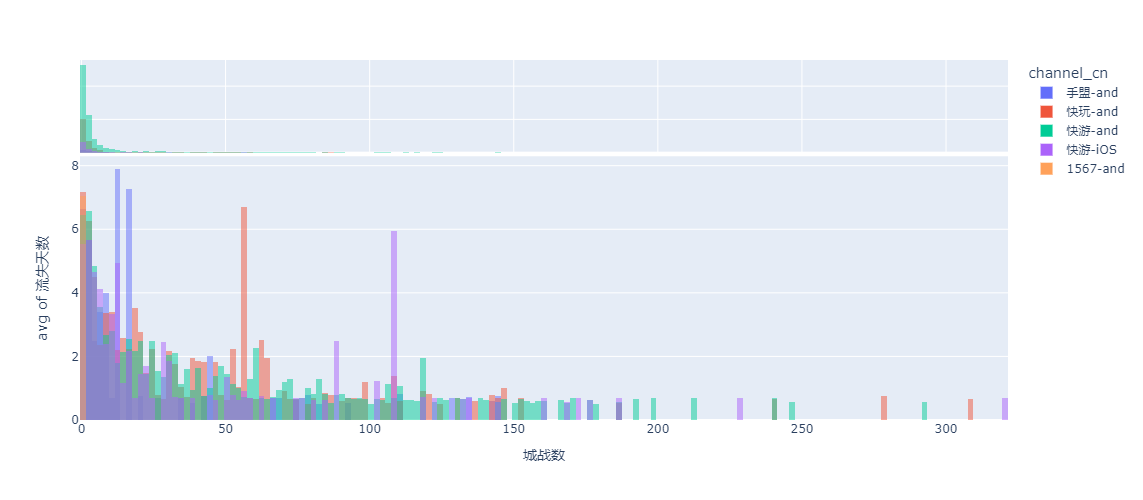

In [21]:
fig_attack_player_num = px.histogram(df, x='attack_player_num', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                                    labels = {'attack_player_num':'城战数', 'leave_days':'流失天数'})
fig_attack_player_num.update_layout(
#     autosize=False,
#     width=600,
    height=500
)

---

钻石的总消耗数

---

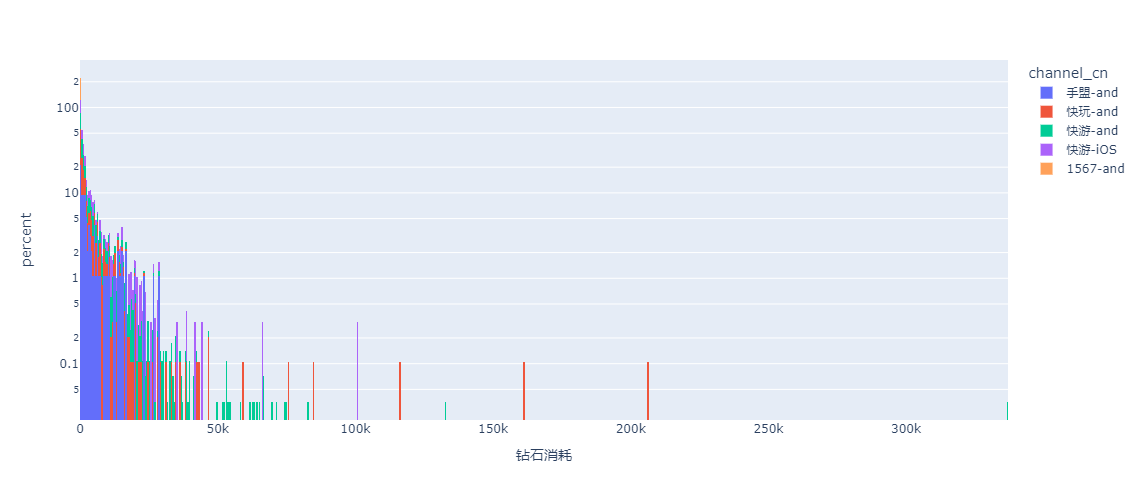

In [45]:
fig_cost_percent = px.histogram(df, x='gold_cost', histfunc='count', 
             histnorm='percent', log_y=True, color='channel_cn',
            labels = {'gold_cost':'钻石消耗'}, nbins=1000,
            ).update_xaxes(categoryorder='total descending')
fig_cost_percent.update_layout(
#     autosize=False,
#     width=500,
    height=500
)

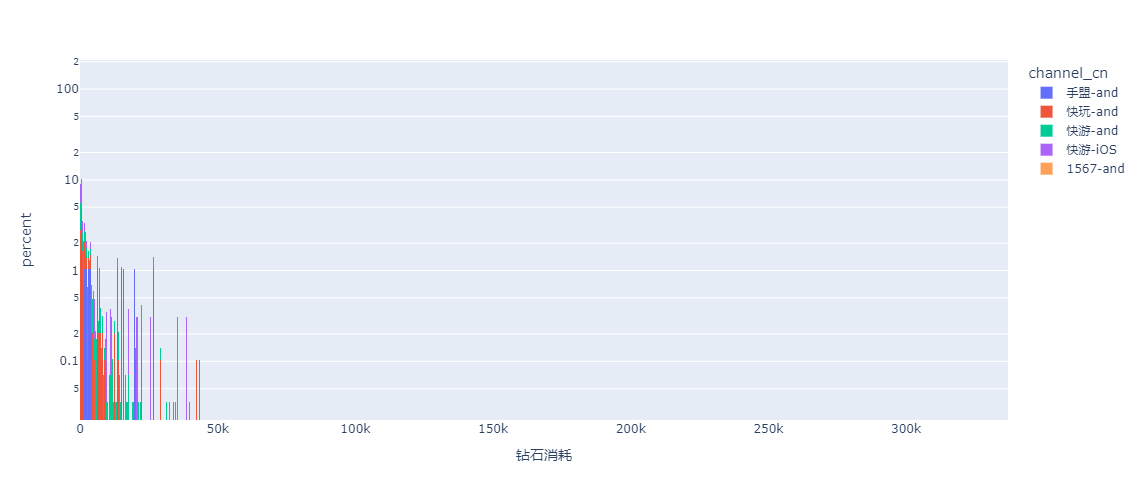

In [44]:
fig_cost_percent = px.histogram(df, x='gold_cost', histfunc='count', 
             histnorm='percent', log_y=True, color='channel_cn',
            labels = {'gold_cost':'钻石消耗'}, nbins=10000,
            ).update_xaxes(categoryorder='total descending')
fig_cost_percent.update_layout(
#     autosize=False,
#     width=500,
    height=500
)

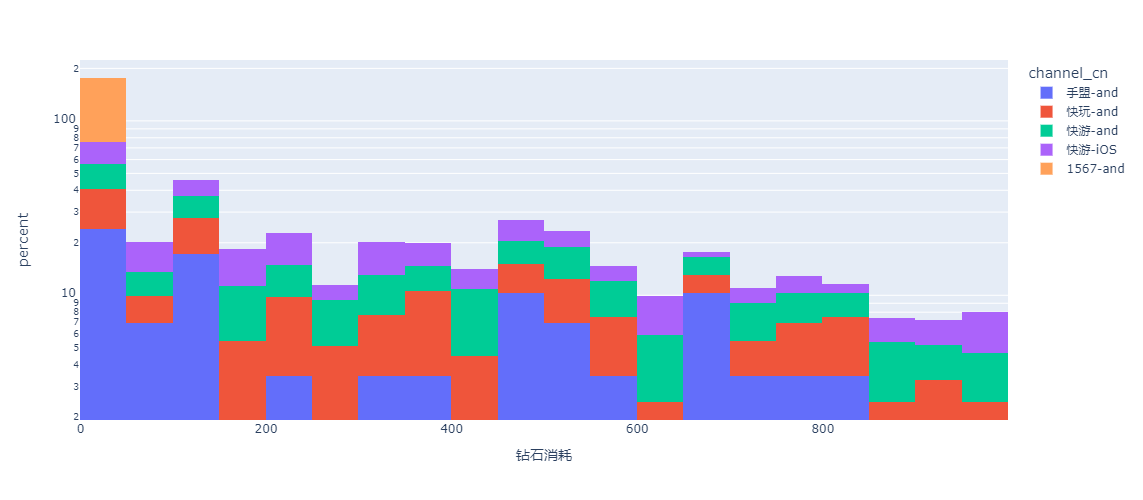

In [43]:
fig_cost_percent = px.histogram(df.query('gold_cost < 1000'), x='gold_cost', histfunc='count', 
             histnorm='percent', log_y=True, color='channel_cn',
            labels = {'gold_cost':'钻石消耗'}
            ).update_xaxes(categoryorder='total descending')
fig_cost_percent.update_layout(
#     autosize=False,
#     width=500,
    height=500
)

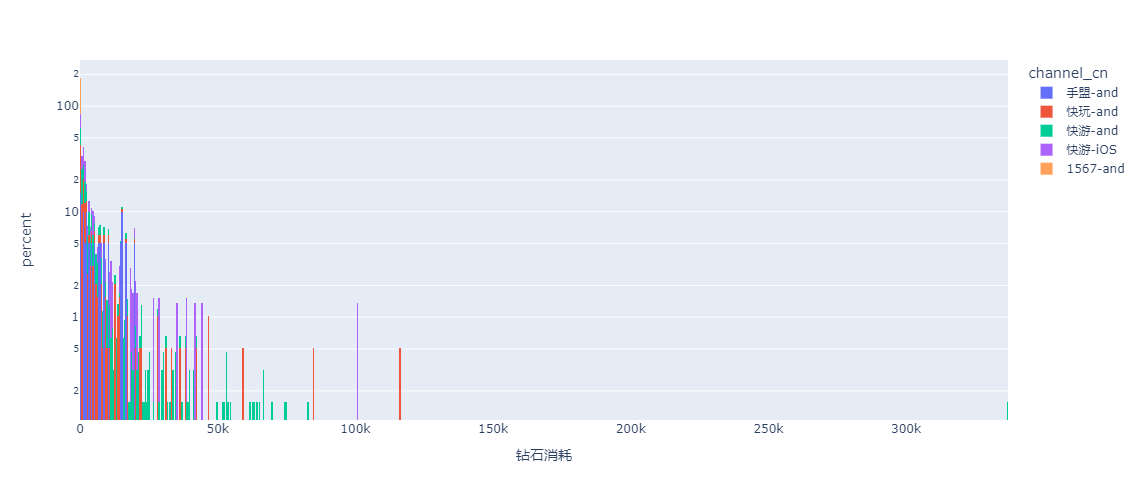

In [40]:
fig_cost_percent = px.histogram(df.query('first_recharge_item != "充值-6元(102)"'), x='gold_cost', histfunc='count', 
             histnorm='percent', log_y=True, color='channel_cn',
            labels = {'gold_cost':'钻石消耗'}, nbins=1000,
            ).update_xaxes(categoryorder='total descending')
fig_cost_percent.update_layout(
#     autosize=False,
#     width=500,
    height=500
)

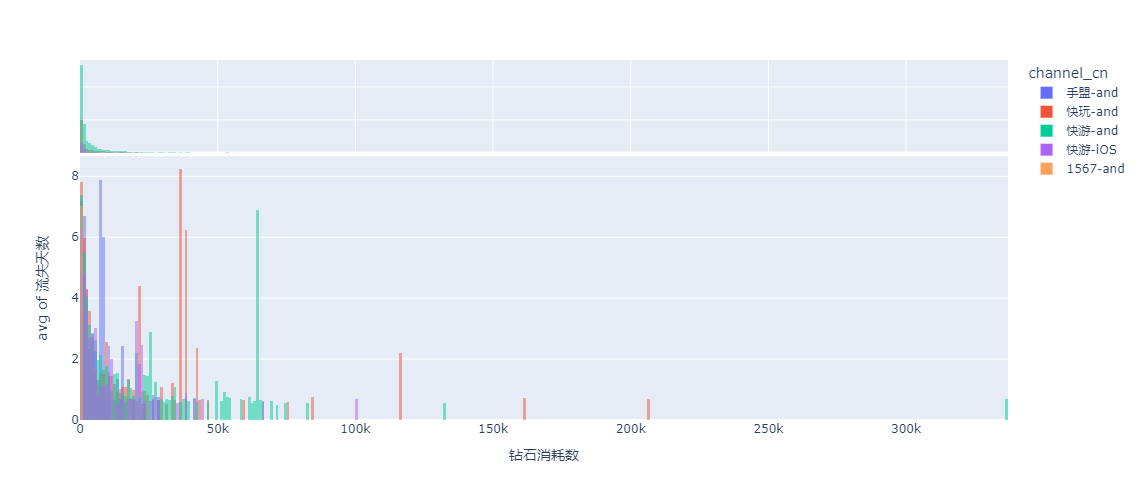

In [23]:
fig_gold_cost = px.histogram(df, x='gold_cost', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                            labels = {'gold_cost':'钻石消耗数', 'leave_days':'流失天数'})
fig_gold_cost.update_layout(
#     autosize=False,
#     width=600,
    height=500
)

---

剩余钻石数

---

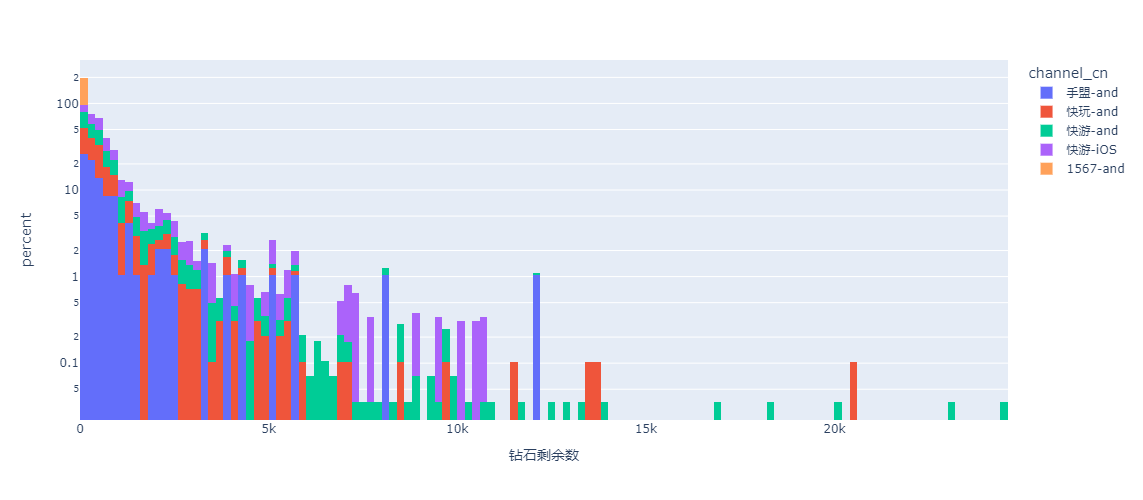

In [47]:
fig_gold_percent = px.histogram(df, x='gold', histfunc='count', 
             histnorm='percent', log_y=True, color='channel_cn',
            labels = {'gold':'钻石剩余数'},
            ).update_xaxes(categoryorder='total descending')
fig_gold_percent.update_layout(
#     autosize=False,
#     width=500,
    height=500
)

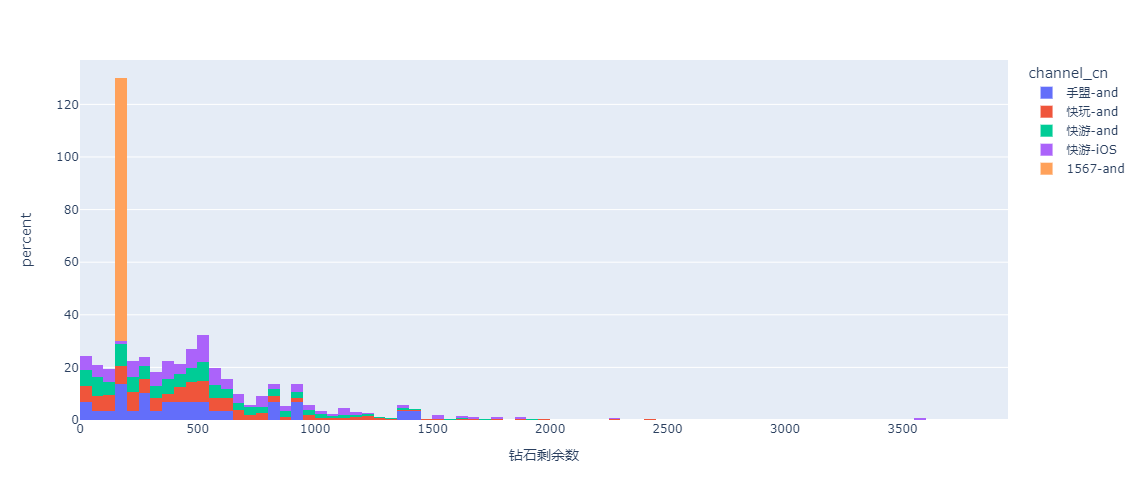

In [49]:
px.histogram(df.query('gold_cost < 1000'), x='gold', histfunc='count', 
             histnorm='percent', color='channel_cn',
            labels = {'gold':'钻石剩余数'},
            ).update_xaxes(categoryorder='total descending').update_layout(
#     autosize=False,
#     width=500,
    height=500
)

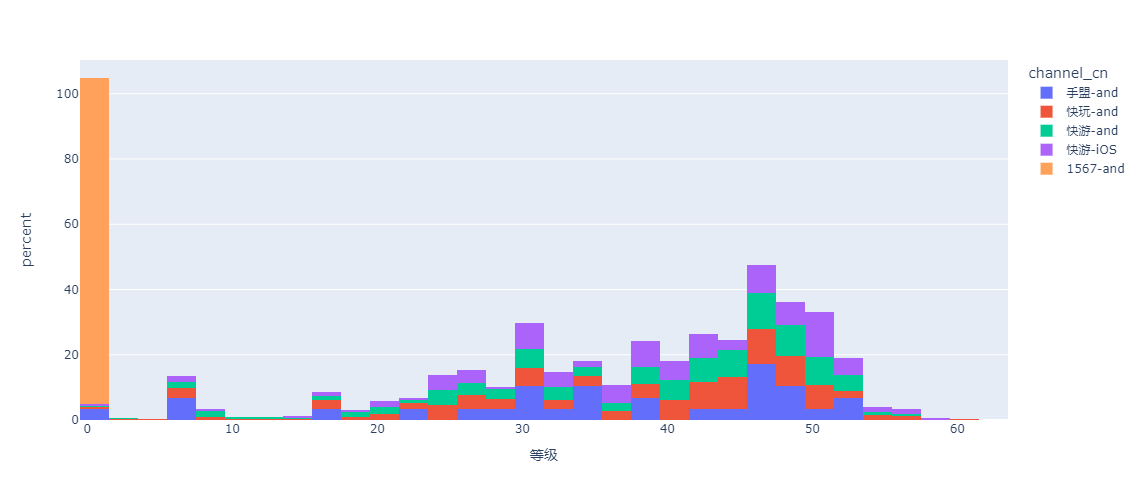

In [50]:
px.histogram(df.query('gold_cost < 1000'), x='level', histfunc='count', 
             histnorm='percent', color='channel_cn',
            labels = {'level':'等级'},
            ).update_xaxes(categoryorder='total descending').update_layout(
#     autosize=False,
#     width=500,
    height=500
)

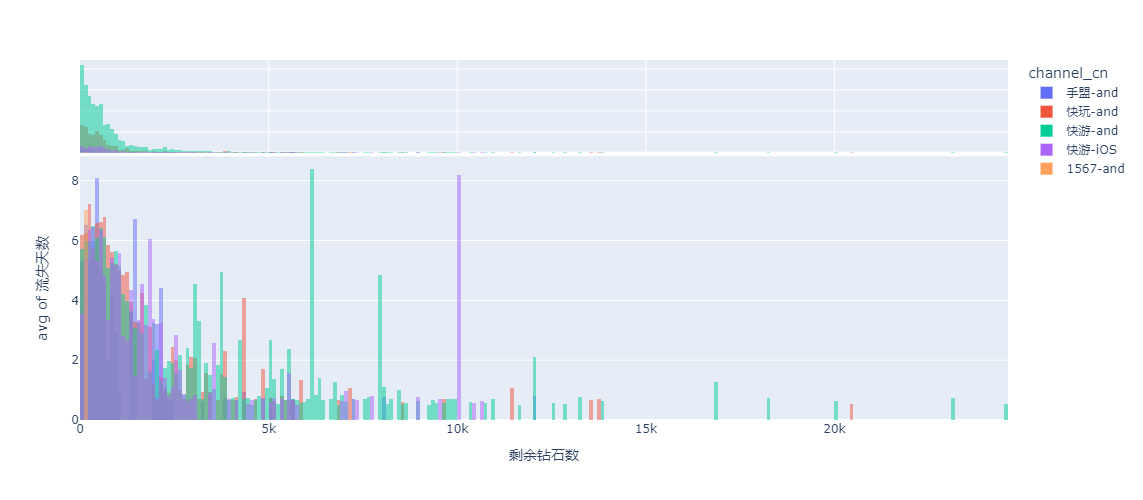

In [24]:
fig_gold = px.histogram(df, x='gold', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                       labels = {'gold':'剩余钻石数', 'leave_days':'流失天数'})
fig_gold.update_layout(
#     autosize=False,
#     width=600,
    height=500
)

---

vip等级

---

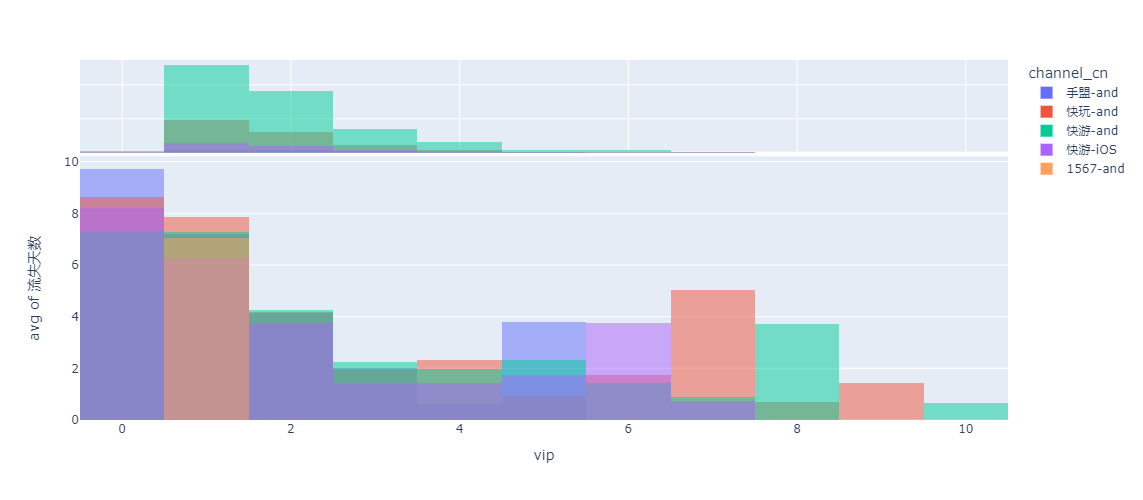

In [25]:
fig_vip = px.histogram(df, x='vip', y='leave_days', marginal="histogram", histfunc='avg', color='channel_cn', barmode='overlay',
                      labels = {'leave_days':'流失天数'})
fig_vip.update_layout(
#     autosize=False,
    width=500,
    height=500
)

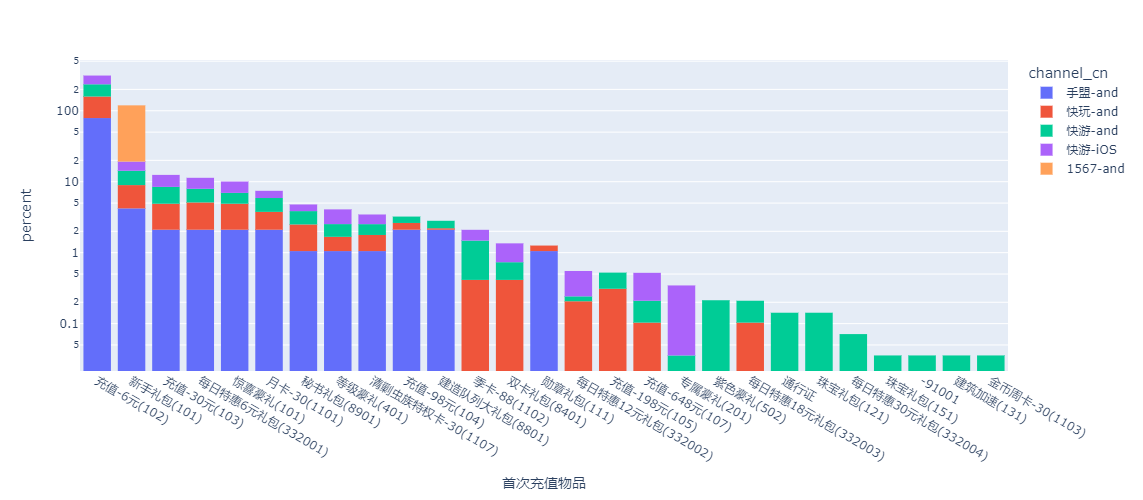

In [29]:
fig_first_pay_percent = px.histogram(df, x='first_recharge_item', histfunc='count', 
             histnorm='percent', log_y=True, color='channel_cn',
            labels = {'first_recharge_item':'首次充值物品'}
            ).update_xaxes(categoryorder='total descending')
fig_first_pay_percent.update_layout(
#     autosize=False,
#     width=500,
    height=500
)

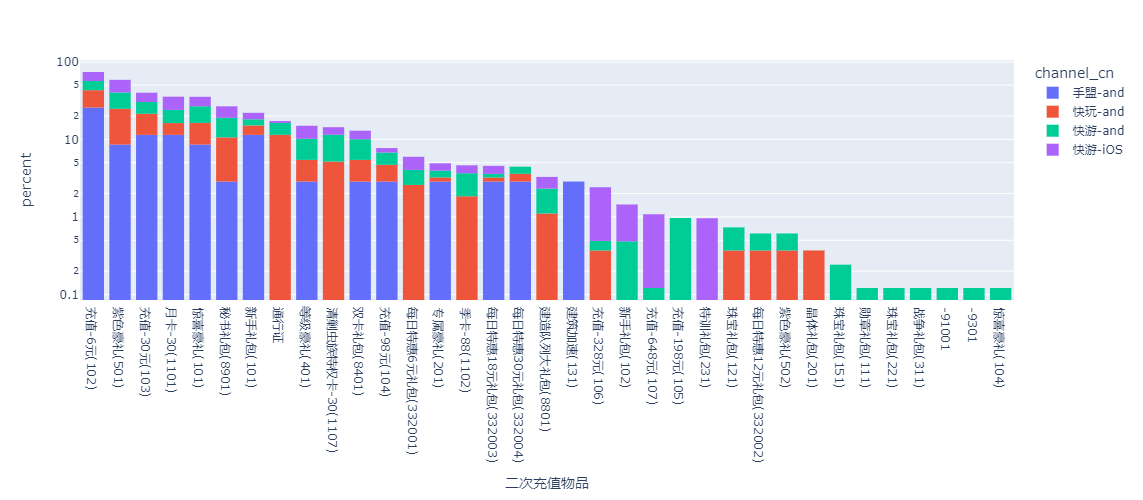

In [30]:
fig_second_pay_percent = px.histogram(df.query('second_recharge_item != 0'), x='second_recharge_item', 
             histfunc='count', histnorm='percent', log_y=True, color='channel_cn',
             labels = {'second_recharge_item':'二次充值物品'}
            ).update_xaxes(categoryorder='total descending')
fig_second_pay_percent.update_layout(
#     autosize=False,
#     width=500,
    height=500
)

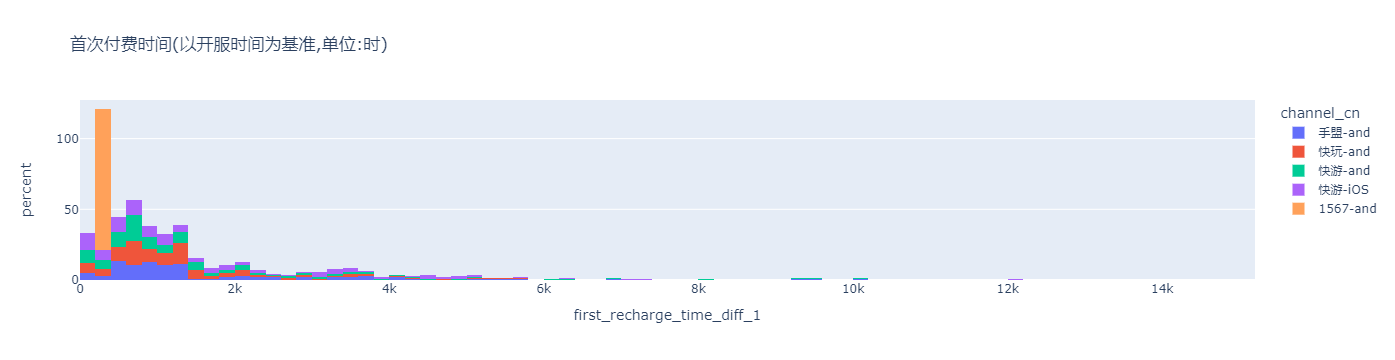

In [10]:
px.histogram(df, x='first_recharge_time_diff_1', histfunc='count', histnorm='percent', title='首次付费时间(以开服时间为基准,单位:时)', color='channel_cn')

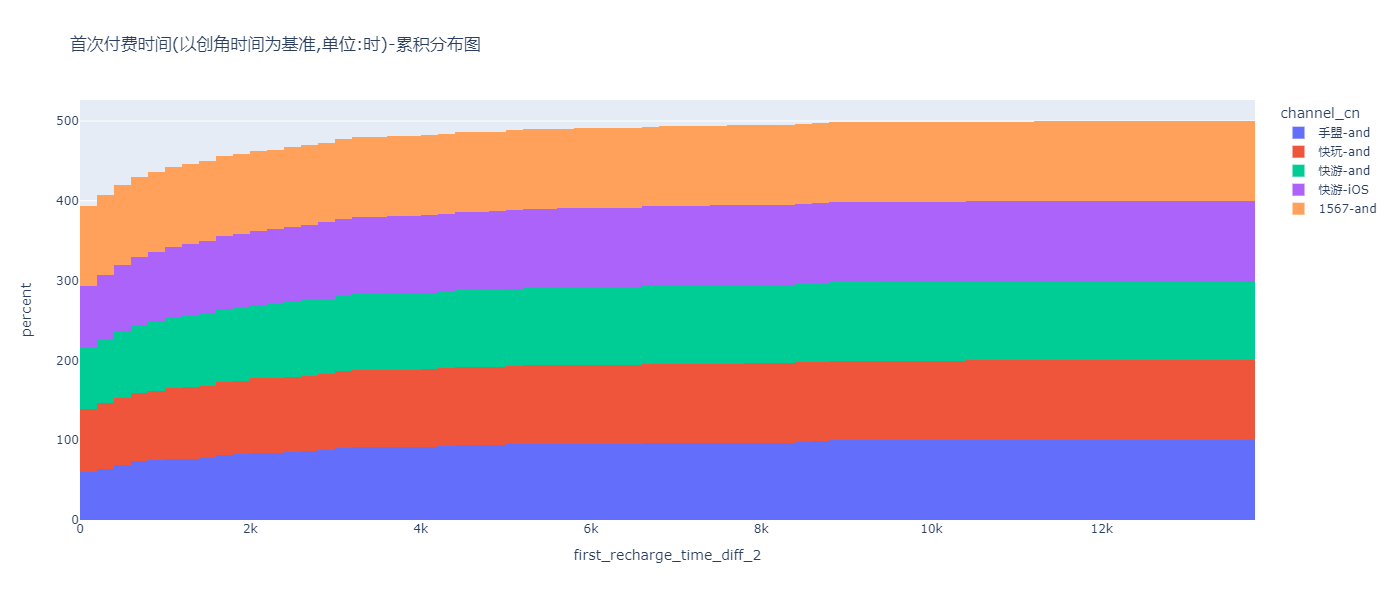

In [11]:
fig_first_pay_create_time = px.histogram(df, x='first_recharge_time_diff_2', histfunc='count', histnorm='percent', title='首次付费时间(以创角时间为基准,单位:时)-累积分布图', 
                                         cumulative=True, color='channel_cn')
fig_first_pay_create_time.update_layout(
#     autosize=False,
    width=800,
    height=600
)

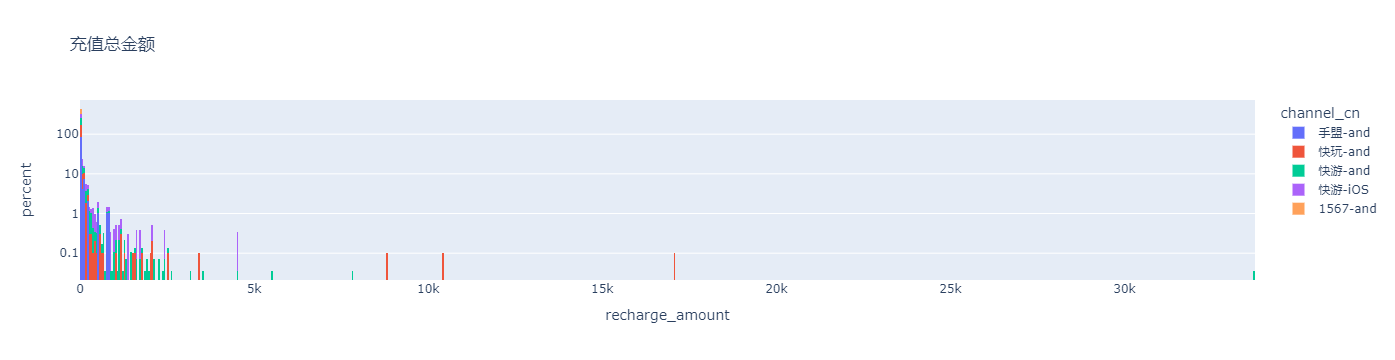

In [14]:
px.histogram(df, x='recharge_amount', histfunc='count', histnorm='percent', title='充值总金额', log_y=True, color='channel_cn')